<a href="https://colab.research.google.com/github/Raggza/Final_Mindx_3/blob/master/Mid_term.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Test 2: Predict Loan Pay Off

* Thông tin về các trường dữ liệu trong data
  1. loan_status: tình trạng khoản vay (2 giá trị Paidoff và Collection)
  2. Principal: giá trị khoản vay gốc (5 giá trị 300, 500, 800, 900, 1000)
  3. terms: thời hạn khoản vay (3 giá trị 7, 15, 30)
  4. effective_date: ngày khoản vay bắt đầu và có hiệu lực
  5. due_date: hạn phải trả khoản vay
  6. age: độ tuổi khách hàng
  7. education: trình độ học vấn khách hàng (4 giá trị High School or Below, Bechalor, college, Master or Above)
  8. Gender: giới tính khách hàng 

##Preparation

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.axes
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [ ]:
train = pd.read_csv('https://raw.githubusercontent.com/maxtran1997gmail/Files/main/loan_train.csv')
train.head()

,Unnamed: 0.1,Unnamed: 0,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [ ]:
#Clone dữ liệu để xử lý
train1 = train.copy()

In [ ]:
del train1['Unnamed: 0']
del train1['Unnamed: 0.1']
train1.head(5)

,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [ ]:
#Kiểm tra null
train1.isna().sum()

loan_status       0
Principal         0
terms             0
effective_date    0
due_date          0
age               0
education         0
Gender            0
dtype: int64

In [ ]:
#Ép kiểu dữ liệu ngày tháng
train1['effective_date']= pd.to_datetime(train1['effective_date'])
train1['due_date']= pd.to_datetime(train1['due_date'])
train1.dtypes

loan_status               object
Principal                  int64
terms                      int64
effective_date    datetime64[ns]
due_date          datetime64[ns]
age                        int64
education                 object
Gender                    object
dtype: object

##EDA

Principal  loan_status
300        PAIDOFF        1.000000
500        PAIDOFF        1.000000
800        PAIDOFF        0.777778
           COLLECTION     0.222222
900        PAIDOFF        1.000000
1000       PAIDOFF        0.736434
           COLLECTION     0.263566
Name: loan_status, dtype: float64

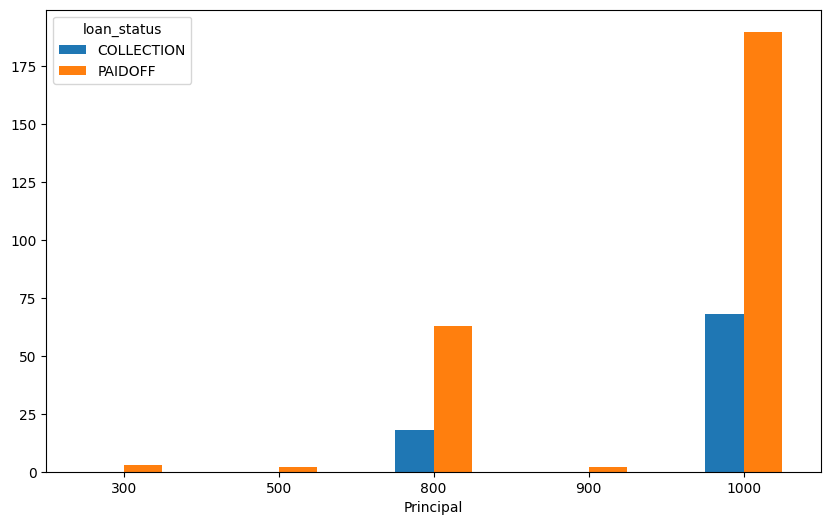

In [ ]:
plt1 = train1.groupby(['Principal', 'loan_status']).size().reset_index().pivot(columns = 'loan_status', index = 'Principal', values = 0)
plt1.plot.bar(figsize=(10,6), rot = 0)
train1.groupby(['Principal'])['loan_status'].value_counts(normalize = True)

Nhận xét:
- Các khoản vay 300, 500 và 900 ít được lựa chọn và có tỷ lệ 100% hoàn trả đúng hạn.
- Các khoản vay 800 và 1000 được nhiều người lựa chọn hơn và tỷ lệ lớn hơn 70% hoàn trả đúng hạn.

Text(0, 0.5, 'Count')

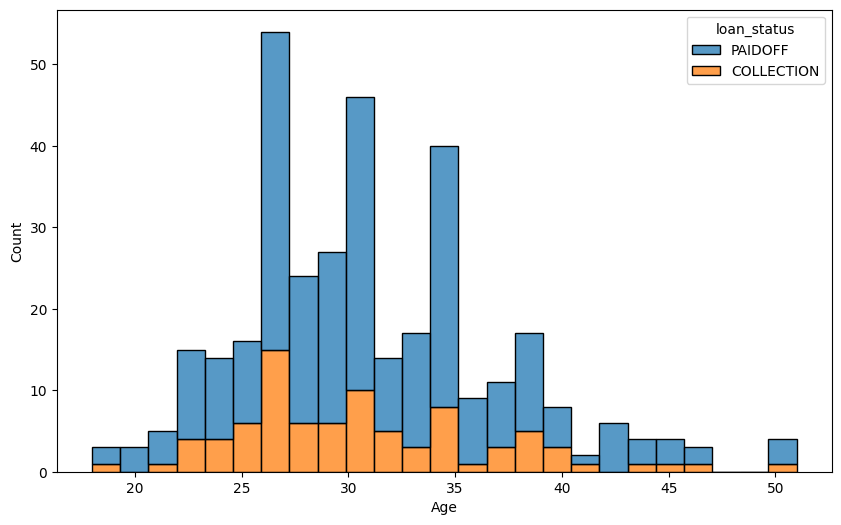

In [ ]:
plt2 = train1.iloc[:, [0, 5]]

f = plt.figure(figsize=(10,6))
ax = f.add_subplot(1,1,1)

sns.histplot(data = plt2, ax = ax, stat ="count", multiple = "stack", x = "age", bins = 25, kde=False,
             hue="loan_status", element="bars", legend=True)
ax.set_xlabel("Age")
ax.set_ylabel("Count")

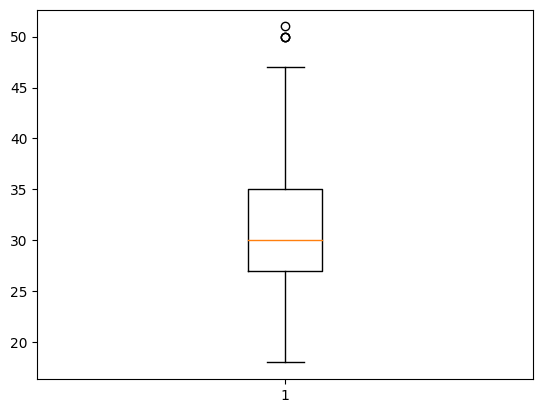

In [ ]:
plt.boxplot(data = plt2, x = "age")
plt.show()

Nhận xét:
- Xu hướng khách hàng vay tiền năm trong độ tuổi từ 26 đến 35 tuổi.
- Các khách hàng trên 47 tuổi có xu hướng thể hiện như các giá trị outlier

education             loan_status
Bechalor              PAIDOFF        0.750000
                      COLLECTION     0.250000
High School or Below  PAIDOFF        0.741722
                      COLLECTION     0.258278
Master or Above       COLLECTION     0.500000
                      PAIDOFF        0.500000
college               PAIDOFF        0.765101
                      COLLECTION     0.234899
Name: loan_status, dtype: float64

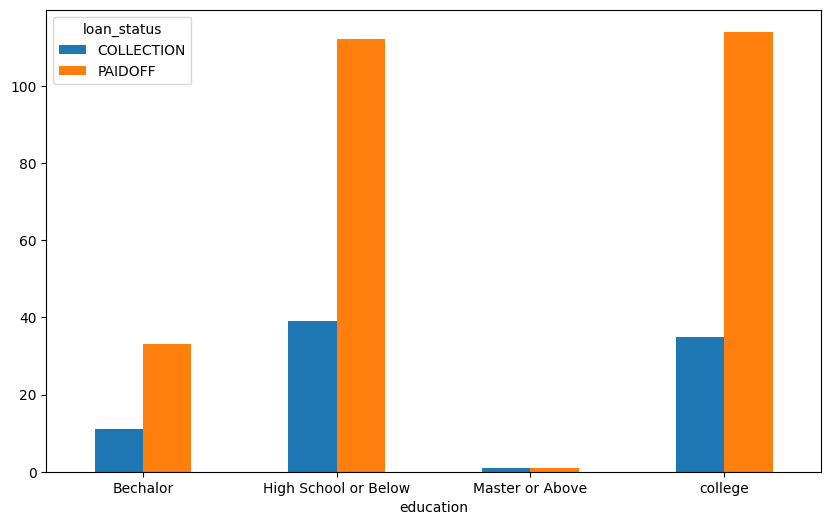

In [ ]:
plt3 = train.groupby(['education', 'loan_status']).size().reset_index().pivot(columns = 'loan_status', index = 'education', values = 0)
plt3.plot.bar(figsize=(10,6), rot = 0)
train.groupby(['education'])['loan_status'].value_counts(normalize = True)

Nhận xét:
- Số lượng khách hàng trình độ từ Master trở lên rất ít với tỷ lệ thanh toán đúng hạn là 50%.
- Với các trình độ khác, phần lớn khách hàng vay tiền đều thanh toán đúng hạn với tỷ lệ lớn hơn 70%.

Gender  loan_status
female  PAIDOFF        0.865385
        COLLECTION     0.134615
male    PAIDOFF        0.731293
        COLLECTION     0.268707
Name: loan_status, dtype: float64

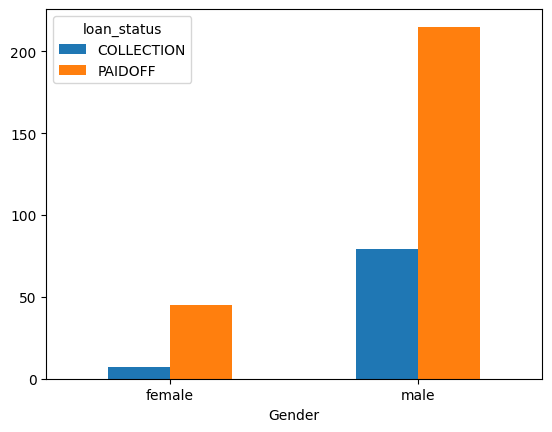

In [ ]:
plt4 = train1.groupby(['Gender', 'loan_status']).size().reset_index().pivot(columns = 'loan_status', index = 'Gender', values = 0)
plt4.plot.bar(rot = 0)
train1.groupby(['Gender'])['loan_status'].value_counts(normalize = True)

Nhận xét:
- Phần lớn khách hàng vay tiền là nam giới.

##Pre Processing

###Train Data 

In [ ]:
#Bỏ các bản ghi người vay có trình độ học vấn Master trở lên
train1.drop(train1[train1['education'] == 'Master or Above'].index, inplace = True)
train1['education'].unique()

array(['High School or Below', 'Bechalor', 'college'], dtype=object)

In [ ]:
#Bỏ các bản ghi người vay trên 47 tuổi
train1.drop(train1[train1['age'] >= 47].index, inplace = True)

<Axes: xlabel='weekday'>

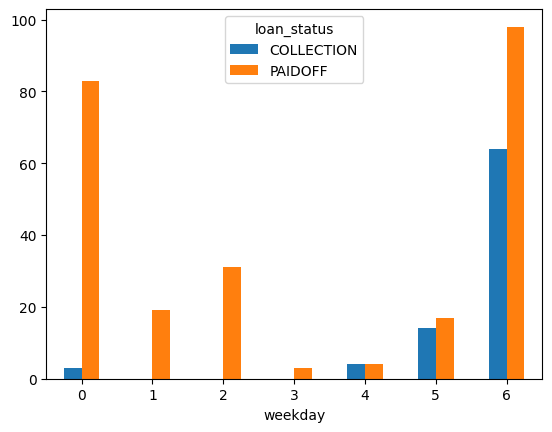

In [ ]:
# Liên hệ giữa ngày nhận khoản vay trong tuần và tình trạng thanh toán
train1['weekday'] = train1['effective_date'].dt.weekday
train1[['weekday','loan_status']].groupby(['weekday','loan_status']).size().reset_index().pivot(columns = 'loan_status', index = 'weekday', values = 0).plot(kind = 'bar', rot = 0)

Nhận xét:
- Các ngày thứ 6, 7 và chủ nhật có tỷ lệ chưa hoàn trả nợ cao hơn so với các ngày khác.

In [ ]:
#Xử lý dữ liệu ngày tháng
train1['weekend'] = train1['weekday'].apply(lambda x: 1 if (x>3)  else 0)
del train1['due_date']
del train1['effective_date']
del train1['weekday']
train1.head(5)

,loan_status,Principal,terms,age,education,Gender,weekend
0,PAIDOFF,1000,30,45,High School or Below,male,0
1,PAIDOFF,1000,30,33,Bechalor,female,0
2,PAIDOFF,1000,15,27,college,male,0
3,PAIDOFF,1000,30,28,college,female,1
4,PAIDOFF,1000,30,29,college,male,1


In [ ]:
#Sử dụng Label Encoder
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
le = preprocessing.LabelEncoder()
train1['education'] = le.fit_transform(train1['education'])
train1['Gender'] = le.fit_transform(train1['Gender'])
train1['terms'] = le.fit_transform(train1['terms'])
train1.head(5)

,loan_status,Principal,terms,age,education,Gender,weekend
0,PAIDOFF,1000,2,45,1,1,0
1,PAIDOFF,1000,2,33,0,0,0
2,PAIDOFF,1000,1,27,2,1,0
3,PAIDOFF,1000,2,28,2,0,1
4,PAIDOFF,1000,2,29,2,1,1


In [ ]:
from sklearn.preprocessing import StandardScaler
train2 = train1[['Principal','terms','age','education', 'Gender','weekend']]
train2 = preprocessing.StandardScaler().fit(train2).transform(train2)
train2 = pd.DataFrame(data=train2, columns=['Principal','terms','age','education', 'Gender','weekend'])
train2.head(5)

,Principal,terms,age,education,Gender,weekend
0,0.508736,0.867302,2.555007,-0.445634,0.424918,-1.202515
1,0.508736,0.867302,0.419729,-1.902515,-2.353394,-1.202515
2,0.508736,-0.867302,-0.647910,1.011247,0.424918,-1.202515
3,0.508736,0.867302,-0.469971,1.011247,-2.353394,0.831590
4,0.508736,0.867302,-0.292031,1.011247,0.424918,0.831590


###Test Data

In [ ]:
test = pd.read_csv('https://raw.githubusercontent.com/maxtran1997gmail/Files/main/loan_test.csv')

In [ ]:
#Clone dữ liệu để xử lý
test1 = test.copy()

In [ ]:
del test1['Unnamed: 0']
del test1['Unnamed: 0.1']
test1.head(5)

,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,PAIDOFF,1000,30,9/8/2016,10/7/2016,50,Bechalor,female
1,PAIDOFF,300,7,9/9/2016,9/15/2016,35,Master or Above,male
2,PAIDOFF,1000,30,9/10/2016,10/9/2016,43,High School or Below,female
3,PAIDOFF,1000,30,9/10/2016,10/9/2016,26,college,male
4,PAIDOFF,800,15,9/11/2016,9/25/2016,29,Bechalor,male


In [ ]:
#Kiểm tra xem có dữ liệu null
test1.isna().sum()

loan_status       0
Principal         0
terms             0
effective_date    0
due_date          0
age               0
education         0
Gender            0
dtype: int64

In [ ]:
#Ép kiểu dữ liệu ngày tháng
test1['effective_date']= pd.to_datetime(test1['effective_date'])
test1['due_date']= pd.to_datetime(test1['due_date'])
test1.dtypes

loan_status               object
Principal                  int64
terms                      int64
effective_date    datetime64[ns]
due_date          datetime64[ns]
age                        int64
education                 object
Gender                    object
dtype: object

In [ ]:
#Bỏ các bản ghi người vay có trình độ học vấn Master trở lên
test1.drop(test1[test1['education'] == 'Master or Above'].index, inplace = True)
test1['education'].unique()

array(['Bechalor', 'High School or Below', 'college'], dtype=object)

In [ ]:
#Bỏ các bản ghi người vay trên 47 tuổi
test1.drop(test1[test1['age'] >= 47].index, inplace = True)

In [ ]:
#Xử lý dữ liệu ngày tháng
test1['weekday'] = test1['effective_date'].dt.weekday
test1['weekend'] = test1['weekday'].apply(lambda x: 1 if (x>3)  else 0)
del test1['due_date']
del test1['effective_date']
del test1['weekday']
test1.head(5)

,loan_status,Principal,terms,age,education,Gender,weekend
2,PAIDOFF,1000,30,43,High School or Below,female,1
3,PAIDOFF,1000,30,26,college,male,1
4,PAIDOFF,800,15,29,Bechalor,male,1
5,PAIDOFF,700,15,33,High School or Below,male,1
6,PAIDOFF,1000,15,24,college,male,1


In [ ]:
test1['education'] = le.fit_transform(test1['education'])
test1['Gender'] = le.fit_transform(test1['Gender'])
test1['terms'] = le.fit_transform(test1['terms'])
test1.head(5)

,loan_status,Principal,terms,age,education,Gender,weekend
2,PAIDOFF,1000,2,43,1,0,1
3,PAIDOFF,1000,2,26,2,1,1
4,PAIDOFF,800,1,29,0,1,1
5,PAIDOFF,700,1,33,1,1,1
6,PAIDOFF,1000,1,24,2,1,1


In [ ]:
from sklearn.preprocessing import StandardScaler
test2 = test1[['Principal','terms','age','education', 'Gender','weekend']]
test2 = preprocessing.StandardScaler().fit(test2).transform(test2)
test2 = pd.DataFrame(data=test2, columns=['Principal','terms','age','education', 'Gender','weekend'])
test2.head(5)

,Principal,terms,age,education,Gender,weekend
0,0.495069,0.863277,2.138523,-0.448265,-2.024846,0.738549
1,0.495069,0.863277,-0.972382,0.980581,0.493865,0.738549
2,-1.082964,-0.709120,-0.423399,-1.877112,0.493865,0.738549
3,-1.871980,-0.709120,0.308579,-0.448265,0.493865,0.738549
4,0.495069,-0.709120,-1.338371,0.980581,0.493865,0.738549


##Model

<Axes: >

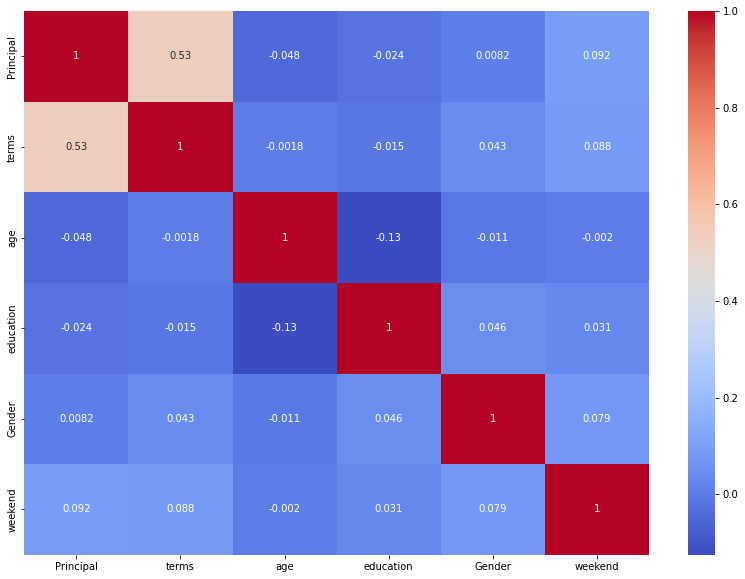

In [ ]:
plt.figure(figsize=(14,10))
sns.heatmap(train1.corr(), annot=True, cmap='coolwarm')

###Chia tập train và test dữ liệu

In [ ]:
y_train = train1["loan_status"].values
X_train = train2[['Principal','terms','age','education','Gender','weekend']]

In [ ]:
y_test = test1["loan_status"].values
X_test = test2[['Principal','terms','age','education','Gender','weekend']]

In [ ]:
y_test.shape

(51,)

In [ ]:
X_test.shape

(51, 6)

###Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
LR = LogisticRegression(solver='liblinear').fit(X_train,y_train)

In [ ]:
y_pred_lr = LR.predict(X_test)
y_pred_lr

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF'], dtype=object)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[37  0]
 [14  0]]


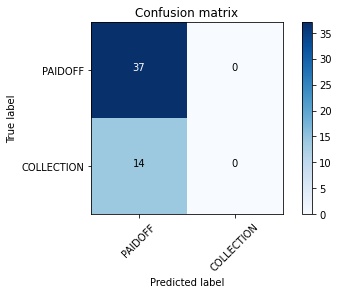

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred_lr, labels=['PAIDOFF','COLLECTION'])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['PAIDOFF','COLLECTION'],normalize= False,  title='Confusion matrix')

In [ ]:
print("Accuracy of LR is:", 100 * accuracy_score(y_test, y_pred_lr), '%')

Accuracy of LR is: 72.54901960784314 %


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

  COLLECTION       0.00      0.00      0.00        14
     PAIDOFF       0.73      1.00      0.84        37

    accuracy                           0.73        51
   macro avg       0.36      0.50      0.42        51
weighted avg       0.53      0.73      0.61        51



###Navie Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
y_pred_gnb = gnb.fit(X_train, y_train).predict(X_test)

Confusion matrix, without normalization
[[26 11]
 [ 4 10]]


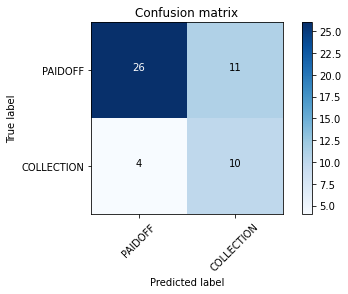

In [ ]:
# Confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred_gnb, labels=['PAIDOFF','COLLECTION'])
np.set_printoptions(precision=2)

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['PAIDOFF','COLLECTION'],normalize= False,  title='Confusion matrix')

In [ ]:
print("Accuracy of GNB is:", 100 * accuracy_score(y_test, y_pred_gnb), '%')

Accuracy of GNB is: 70.58823529411765 %


In [ ]:
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

  COLLECTION       0.00      0.00      0.00        14
     PAIDOFF       0.73      1.00      0.84        37

    accuracy                           0.73        51
   macro avg       0.36      0.50      0.42        51
weighted avg       0.53      0.73      0.61        51



###SVM

In [ ]:
from sklearn.svm import SVC

In [ ]:
# SVM với rbf kernel và C=1.0
svc = SVC(kernel = 'rbf', C = 1.0) 
svc.fit(X_train,y_train)
y_pred_svc = svc.predict(X_test)

Confusion matrix, without normalization
[[35  2]
 [14  0]]


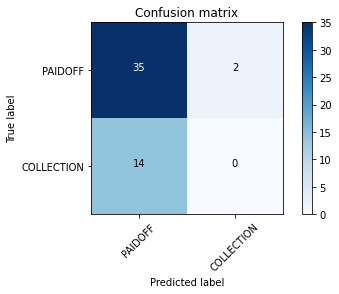

In [ ]:
# Confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred_svc, labels=['PAIDOFF','COLLECTION'])
np.set_printoptions(precision=2)

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['PAIDOFF','COLLECTION'],normalize= False,  title='Confusion matrix')

In [ ]:
from sklearn import metrics
print("Accuracy of SVC is:", 100 * metrics.accuracy_score(y_test, y_pred_svc), '%')

Accuracy of SVC is: 68.62745098039215 %


In [ ]:
print(classification_report(y_test, y_pred_svc))

              precision    recall  f1-score   support

  COLLECTION       0.00      0.00      0.00        14
     PAIDOFF       0.71      0.95      0.81        37

    accuracy                           0.69        51
   macro avg       0.36      0.47      0.41        51
weighted avg       0.52      0.69      0.59        51



###Decision Tree

In [ ]:
from sklearn import tree
from sklearn.datasets import load_iris

In [ ]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)

[Text(0.19848090277777777, 0.96875, 'Days <= -0.185\ngini = 0.375\nsamples = 340\nvalue = [85, 255]\nclass = COLLECTION'),
 Text(0.044444444444444446, 0.90625, 'education <= 0.283\ngini = 0.042\nsamples = 139\nvalue = [3, 136]\nclass = COLLECTION'),
 Text(0.03333333333333333, 0.84375, 'gini = 0.0\nsamples = 83\nvalue = [0, 83]\nclass = COLLECTION'),
 Text(0.05555555555555555, 0.84375, 'age <= 1.398\ngini = 0.101\nsamples = 56\nvalue = [3, 53]\nclass = COLLECTION'),
 Text(0.022222222222222223, 0.78125, 'terms <= 0.0\ngini = 0.077\nsamples = 50\nvalue = [2, 48]\nclass = COLLECTION'),
 Text(0.011111111111111112, 0.71875, 'gini = 0.0\nsamples = 25\nvalue = [0, 25]\nclass = COLLECTION'),
 Text(0.03333333333333333, 0.71875, 'age <= -0.381\ngini = 0.147\nsamples = 25\nvalue = [2, 23]\nclass = COLLECTION'),
 Text(0.022222222222222223, 0.65625, 'age <= -1.004\ngini = 0.298\nsamples = 11\nvalue = [2, 9]\nclass = COLLECTION'),
 Text(0.011111111111111112, 0.59375, 'gini = 0.0\nsamples = 4\nvalue =

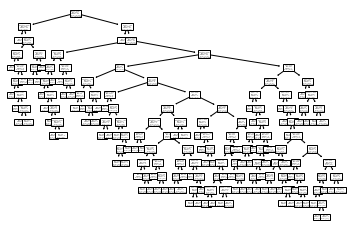

In [ ]:
tree.plot_tree(clf,feature_names=['Principal','terms','age','education','Gender','Days'], class_names=['PAIDOFF','COLLECTION'])

In [ ]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text

In [ ]:
decision_tree = DecisionTreeClassifier(random_state=0, max_depth=4)
decision_tree = decision_tree.fit(X_train, y_train)
r = export_text(decision_tree, feature_names=['Principal','terms','age','education','Gender','Days'])
print(r)

|--- Days <= -0.19
|   |--- education <= 0.28
|   |   |--- class: PAIDOFF
|   |--- education >  0.28
|   |   |--- age <= 1.40
|   |   |   |--- terms <= 0.00
|   |   |   |   |--- class: PAIDOFF
|   |   |   |--- terms >  0.00
|   |   |   |   |--- class: PAIDOFF
|   |   |--- age >  1.40
|   |   |   |--- age <= 1.58
|   |   |   |   |--- class: COLLECTION
|   |   |   |--- age >  1.58
|   |   |   |   |--- class: PAIDOFF
|--- Days >  -0.19
|   |--- terms <= -1.73
|   |   |--- class: PAIDOFF
|   |--- terms >  -1.73
|   |   |--- Gender <= -0.96
|   |   |   |--- age <= -0.03
|   |   |   |   |--- class: COLLECTION
|   |   |   |--- age >  -0.03
|   |   |   |   |--- class: PAIDOFF
|   |   |--- Gender >  -0.96
|   |   |   |--- education <= 0.28
|   |   |   |   |--- class: COLLECTION
|   |   |   |--- education >  0.28
|   |   |   |   |--- class: PAIDOFF



In [ ]:
import graphviz

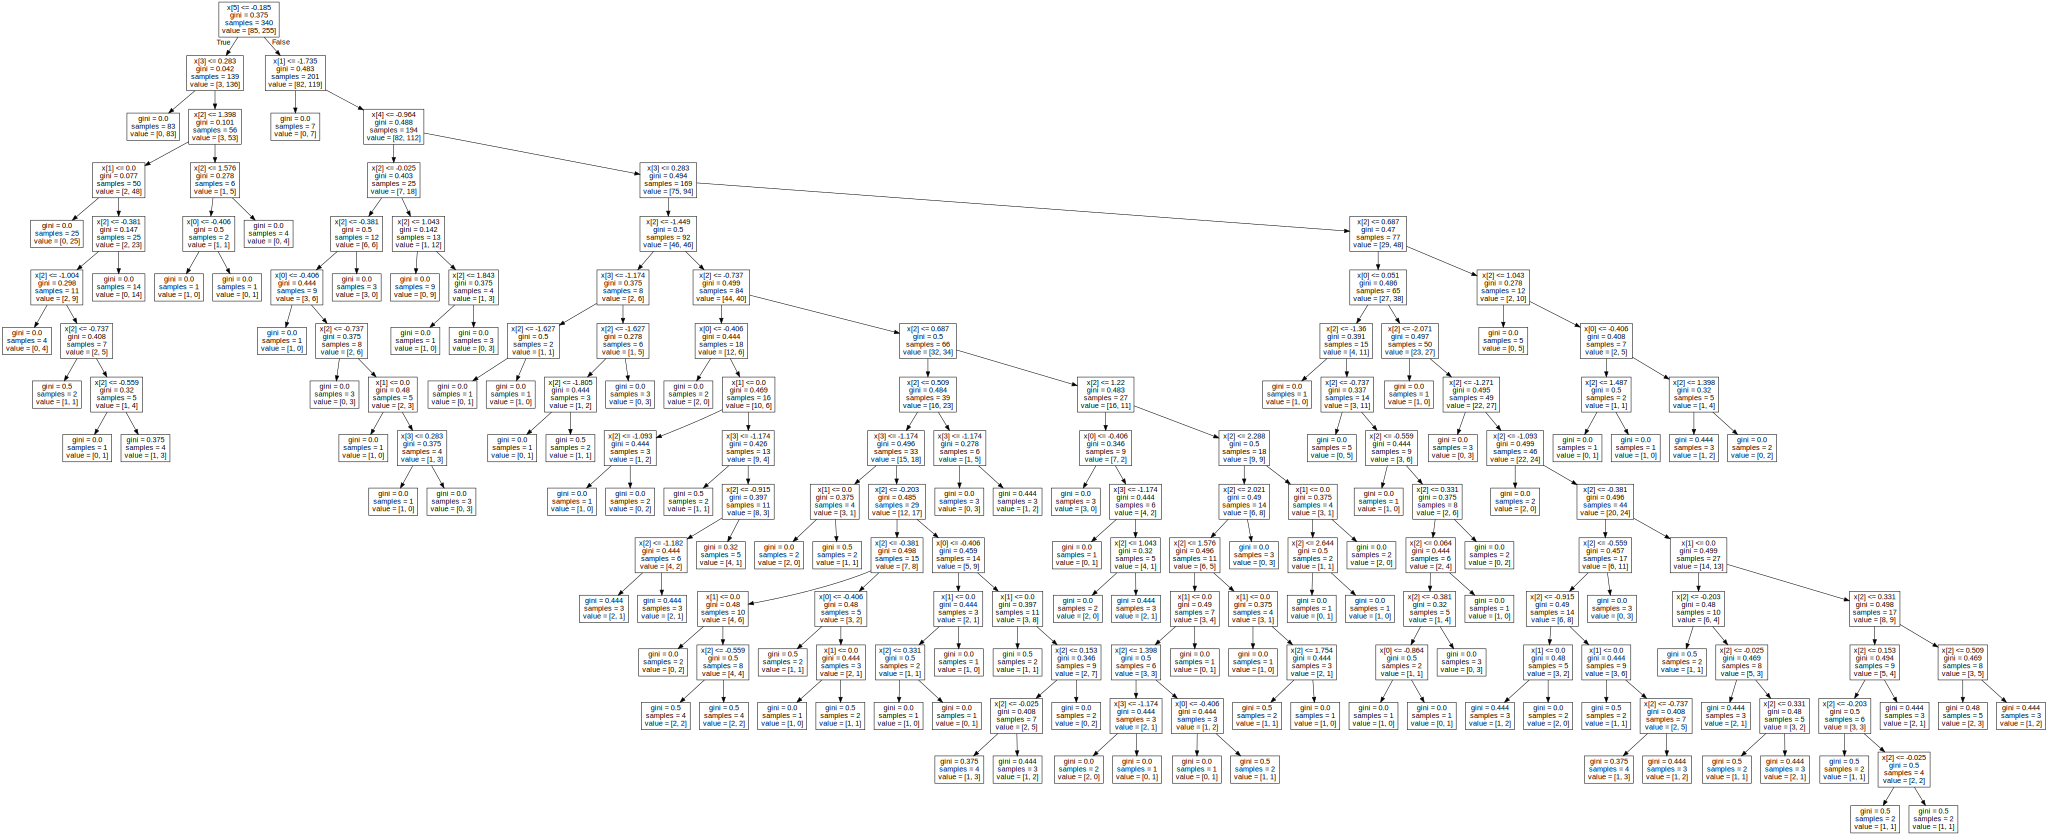

In [ ]:
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("loan status")
graph

In [ ]:
dot_data = tree.export_graphviz(clf, out_file=None,feature_names=['Principal','terms','age','education','Gender','Days'], class_names=['PAIDOFF','COLLECTION'], filled=True, rounded=True, special_characters=True)  
graph = graphviz.Source(dot_data) 

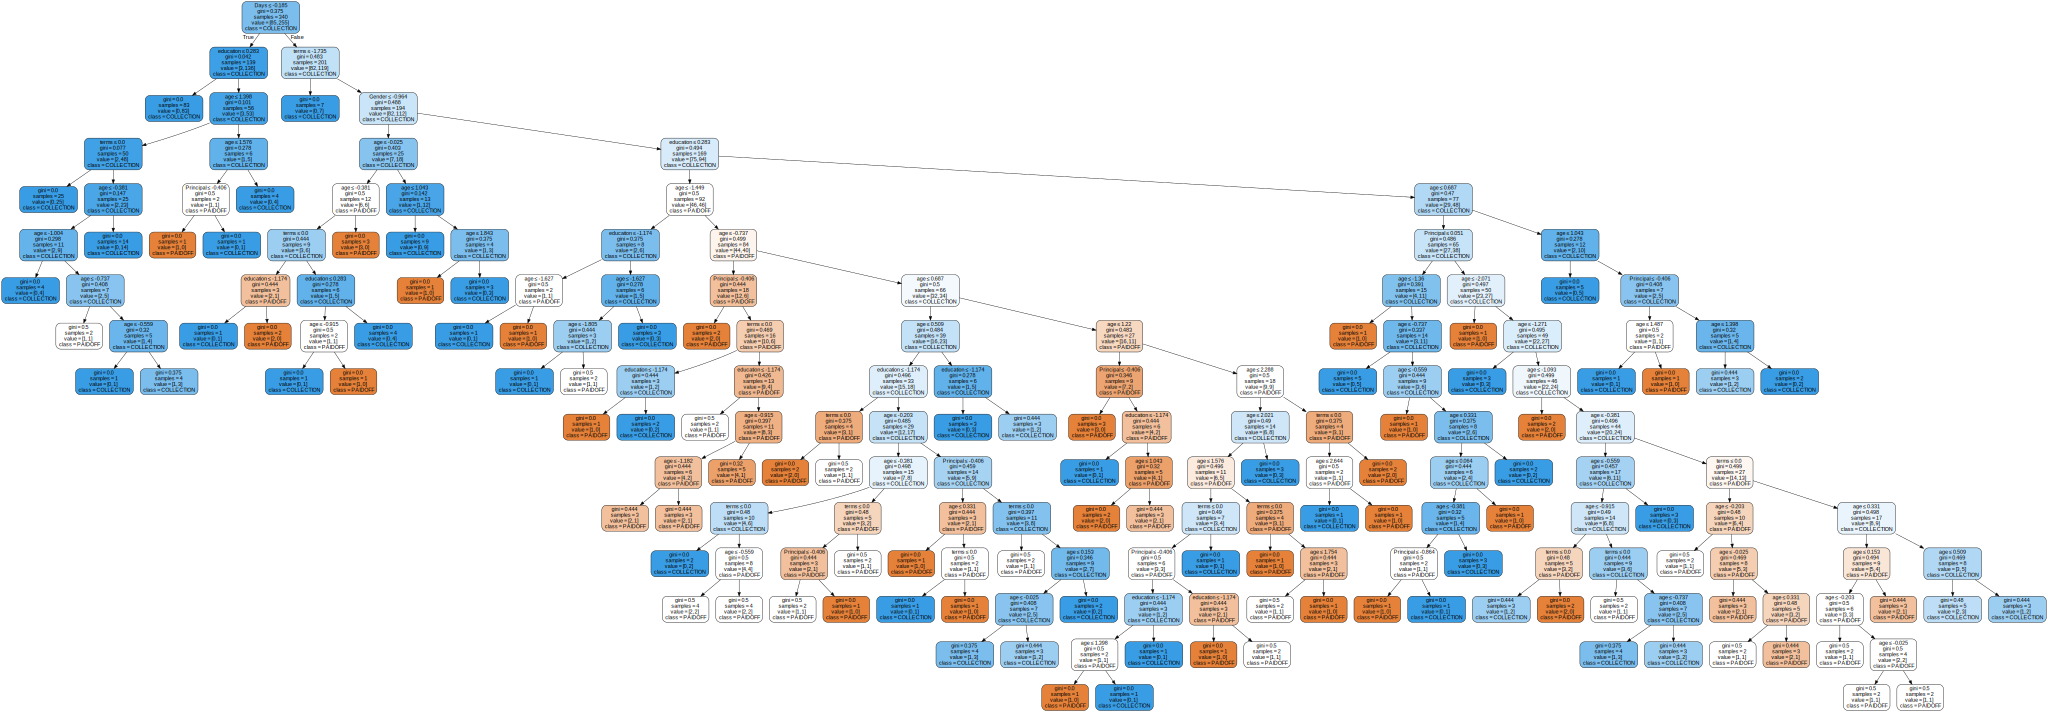

In [ ]:
graph

In [ ]:
heartTree = DecisionTreeClassifier(criterion="entropy")
heartTree.fit(X_train, y_train)
y_pred_dt = heartTree.predict(X_test)

Confusion matrix, without normalization
[[28  9]
 [ 7  7]]


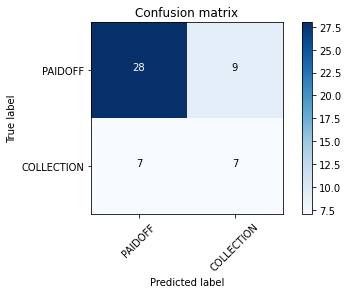

In [ ]:
# Confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred_dt, labels=['PAIDOFF','COLLECTION'])
np.set_printoptions(precision=2)

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['PAIDOFF','COLLECTION'],normalize= False,  title='Confusion matrix')

In [ ]:
print("Accuracy of Decision Tree is:", 100 * accuracy_score(y_test, y_pred_dt), '%')

Accuracy of Decision Tree is: 68.62745098039215 %


In [ ]:
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

  COLLECTION       0.44      0.50      0.47        14
     PAIDOFF       0.80      0.76      0.78        37

    accuracy                           0.69        51
   macro avg       0.62      0.63      0.62        51
weighted avg       0.70      0.69      0.69        51



###Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier 
model = RandomForestClassifier(n_estimators=100) # , max_depth=5, random_state=1
model.fit(X_train, y_train)
y_pred_rf = model.predict(X_test)
score = model.score(X_train, y_train)
print('Training Score:', score)
score = model.score(X_test, y_test)
print('Testing Score:', score)
output = pd.DataFrame({'Predicted':y_pred_rf}) # Heart-Disease yes or no? 1/0
print(output.head())
people = output.loc[output.Predicted == 1]["Predicted"]
rate_people = 0
if len(people) > 0 :
    rate_people = len(people)/len(output)
score_rfc = score
out_rfc = output

Training Score: 0.8911764705882353
Testing Score: 0.7450980392156863
    Predicted
0     PAIDOFF
1  COLLECTION
2  COLLECTION
3  COLLECTION
4     PAIDOFF


Confusion matrix, without normalization
[[31  6]
 [ 7  7]]


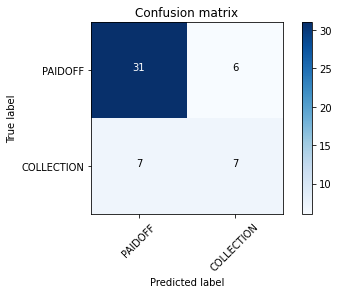

In [ ]:
# Confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred_rf, labels=['PAIDOFF','COLLECTION'])
np.set_printoptions(precision=2)

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['PAIDOFF','COLLECTION'],normalize= False,  title='Confusion matrix')

In [ ]:
print("Accuracy of RF is:", 100 * accuracy_score(y_test, y_pred_rf), '%')

Accuracy of RF is: 74.50980392156863 %


In [ ]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

  COLLECTION       0.54      0.50      0.52        14
     PAIDOFF       0.82      0.84      0.83        37

    accuracy                           0.75        51
   macro avg       0.68      0.67      0.67        51
weighted avg       0.74      0.75      0.74        51



###KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# KNN 
knn = KNeighborsClassifier(n_neighbors = 40, p = 2, weights = 'distance')
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

Confusion matrix, without normalization
[[35  2]
 [13  1]]


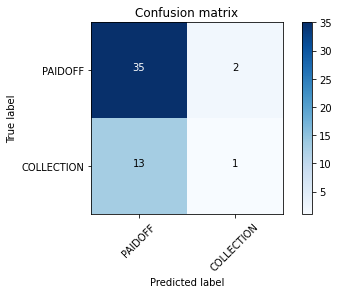

In [ ]:
# Confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred_knn, labels=['PAIDOFF','COLLECTION'])
np.set_printoptions(precision=2)

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['PAIDOFF','COLLECTION'],normalize= False,  title='Confusion matrix')

In [ ]:
print("Accuracy of KNN is:", 100 * accuracy_score(y_test, y_pred_knn), '%')

Accuracy of KNN is: 70.58823529411765 %


In [ ]:
print(classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

  COLLECTION       0.33      0.07      0.12        14
     PAIDOFF       0.73      0.95      0.82        37

    accuracy                           0.71        51
   macro avg       0.53      0.51      0.47        51
weighted avg       0.62      0.71      0.63        51



##Kết luận

In [ ]:
print("Accuracy of LR is: {:.2f} %".format(100 * accuracy_score(y_test, y_pred_lr)))
print("Accuracy of GNB is: {:.2f} %".format(100 * accuracy_score(y_test, y_pred_gnb)))
print("Accuracy of SVM is: {:.2f} %".format(100 * accuracy_score(y_test, y_pred_svc)))
print("Accuracy of Decision Tree is: {:.2f} %".format(100 * accuracy_score(y_test, y_pred_dt)))
print("Accuracy of Random Forest is: {:.2f} %".format(100 * accuracy_score(y_test, y_pred_rf)))
print("Accuracy of KNN is: {:.2f} %".format(100 * accuracy_score(y_test, y_pred_knn)))

Accuracy of LR is: 72.55 %
Accuracy of GNB is: 70.59 %
Accuracy of SVM is: 68.63 %
Accuracy of Decision Tree is: 68.63 %
Accuracy of Random Forest is: 74.51 %
Accuracy of KNN is: 70.59 %


Từ kết quả trên có thể thấy rằng mức độ chính xác của mô hình LR và RF là cao nhất (72,55%)

##Grid Search cho các model

In [ ]:
# import GridSearchCV
from sklearn.model_selection import GridSearchCV

###Logistic Regression

In [ ]:
# GridSearch cho LR
param_grid = [{'solver':['liblinear'],'penalty' : ['l1', 'l2'], 'C': [0.001,0.009,0.01,0.09,1,5,10,25]}
              ]
LR_grid = GridSearchCV(estimator = LR, param_grid = param_grid, cv = 5, verbose=True)
LR_grid.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=5, estimator=LogisticRegression(solver='liblinear'),
             param_grid=[{'C': [0.001, 0.009, 0.01, 0.09, 1, 5, 10, 25],
                          'penalty': ['l1', 'l2'], 'solver': ['liblinear']}],
             verbose=True)

In [ ]:
LR_grid.best_params_

{'C': 5, 'penalty': 'l1', 'solver': 'liblinear'}

###SVM

In [ ]:
# GridSearch cho SVM

parameters = [{'C':[1, 10, 100, 1000], 'kernel':['rbf'], 'gamma':[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]},
               ]
grid_search = GridSearchCV(estimator = svc, param_grid = parameters,
                           scoring = 'accuracy', cv = 5, verbose=0)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [1, 10, 100, 1000],
                          'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,
                                    0.9],
                          'kernel': ['rbf']}],
             scoring='accuracy')

In [ ]:
grid_search.best_estimator_

SVC(C=100, gamma=0.8)

###KNN

In [ ]:
# GridSearch cho KNN
knn_grid = GridSearchCV(estimator = KNeighborsClassifier(), param_grid={'n_neighbors': np.arange(1,50)}, cv=5)
knn_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [ ]:
knn_grid.best_params_

{'n_neighbors': 7}

##Sử dụng các giá trị Grid Search

###Logistic Regression

In [ ]:
# Logistic Regression
LR1 = LogisticRegression(C=5, solver='liblinear').fit(X_train,y_train)
y_pred_lr2 = LR1.predict(X_test)

In [ ]:
print("Accuracy of LR is:", 100 * accuracy_score(y_test, y_pred_lr2), '%')

Accuracy of LR is: 72.54901960784314 %


###SVM

In [ ]:
# SVM với rbf kernel và C=1.0
svc2 = SVC(kernel = 'rbf', C = 100, gamma = 0.8) 
svc2.fit(X_train,y_train)
y_pred_svc2 = svc2.predict(X_test)

In [ ]:
print("Accuracy of SVC is:", 100 * metrics.accuracy_score(y_test, y_pred_svc2), '%')

Accuracy of SVM is: 72.54901960784314 %


###KNN

In [ ]:
# KNN 
knn2 = KNeighborsClassifier(n_neighbors = 7, p = 2, weights = 'distance')
knn2.fit(X_train, y_train)
y_pred_knn2 = knn2.predict(X_test)

In [ ]:
print("Accuracy of KNN is:", 100 * accuracy_score(y_test, y_pred_knn2), '%')

Accuracy of KNN is: 68.62745098039215 %


##So sánh trước và sau Grid Search

In [ ]:
print("Accuracy of LR before Grid Search is: {:.2f} %".format(100 * accuracy_score(y_test, y_pred_lr)))
print("Accuracy of LR after Grid Search is: {:.2f} %".format(100 * accuracy_score(y_test, y_pred_lr2)))
print("Accuracy of SVC before Grid Search is: {:.2f} %".format(100 * accuracy_score(y_test, y_pred_svc)))
print("Accuracy of SVC after Grid Search is: {:.2f} %".format(100 * accuracy_score(y_test, y_pred_svc2)))
print("Accuracy of KNN before Grid Search is: {:.2f} %".format(100 * accuracy_score(y_test, y_pred_knn)))
print("Accuracy of KNN after Grid Search is: {:.2f} %".format(100 * accuracy_score(y_test, y_pred_knn2)))

Accuracy of LR before Grid Search is: 72.55 %
Accuracy of LR after Grid Search is: 72.55 %
Accuracy of SVC before Grid Search is: 68.63 %
Accuracy of SVC after Grid Search is: 72.55 %
Accuracy of KNN before Grid Search is: 70.59 %
Accuracy of KNN after Grid Search is: 68.63 %
